#Data preparation

In [ ]:
from google.colab import files
upload = files.upload()

Saving anemia.csv to anemia.csv


In [ ]:
import pandas as pd
df=pd.read_csv("anemia.csv")
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


#Exploraty data analysis

In [ ]:
df.describe ()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [ ]:
missing_data_anemia = df.isnull().sum()
print(missing_data_anemia)

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


Data outlier:
Hemoglobin    1
MCH           0
MCHC          0
MCV           0
dtype: int64


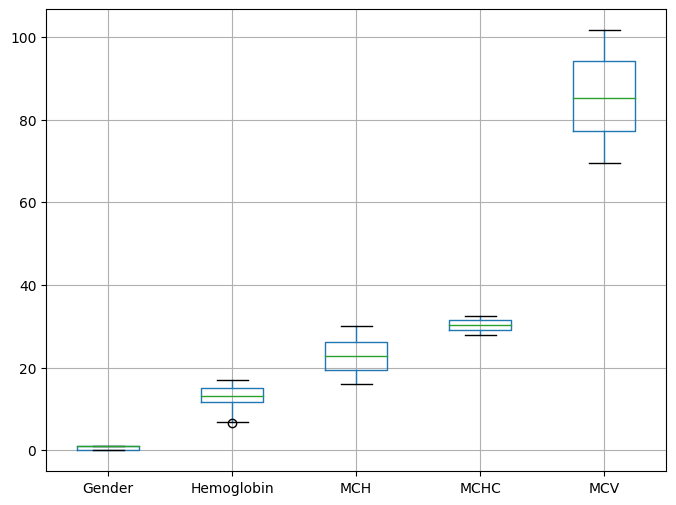

In [ ]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,6))
df[['Gender','Hemoglobin','MCH','MCHC','MCV']].boxplot()

#menghitung Q1, Q3 dan IQR pada kolom numerik
numeric_col=['Hemoglobin','MCH','MCHC','MCV']
Q1=df[numeric_col].quantile(0.25)
Q3=df[numeric_col].quantile(0.75)
IQR=Q3-Q1

#menentukan outlier
outliers=((df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))).sum()

print('Data outlier:')
print(outliers)


In [ ]:
dataset_clean = df.copy()

# Kolom numerik yang digunakan
numeric_col = ['Hemoglobin','MCH','MCHC','MCV']

# Menghitung Q1, Q3 dan IQR pada kolom numerik
Q1 = dataset_clean[numeric_col].quantile(0.25)
Q3 = dataset_clean[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier
outliers = (dataset_clean[numeric_col] < (Q1 - 1.5 * IQR)) | (dataset_clean[numeric_col] > (Q3 + 1.5 * IQR))

# Menghapus outlier
dataset_no_outlier = dataset_clean[~outliers.any(axis=1)]

print('Data frame tanpa outlier:')
print(dataset_no_outlier)

Data frame tanpa outlier:
      Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          1        14.9  22.7  29.1  83.7       0
1          0        15.9  25.4  28.3  72.0       0
2          0         9.0  21.5  29.6  71.2       1
3          0        14.9  16.0  31.4  87.5       0
4          1        14.7  22.0  28.2  99.5       0
...      ...         ...   ...   ...   ...     ...
1416       0        10.6  25.4  28.2  82.9       1
1417       1        12.1  28.3  30.4  86.9       1
1418       1        13.1  17.7  28.1  80.7       1
1419       0        14.3  16.2  29.5  95.2       0
1420       0        11.8  21.2  28.4  98.1       1

[1420 rows x 6 columns]


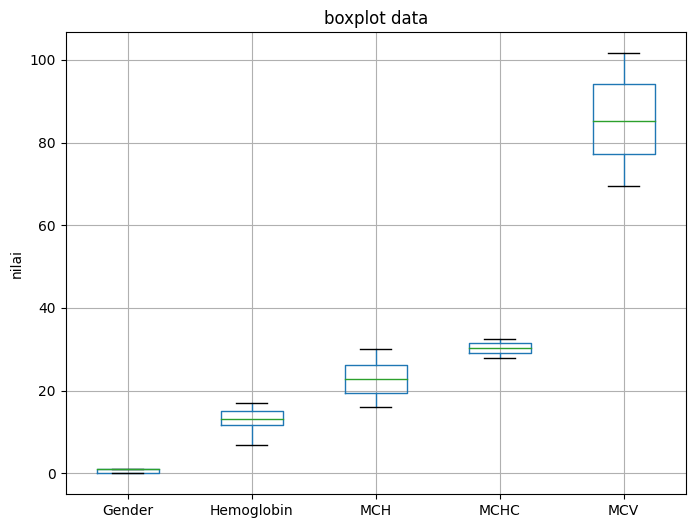

In [ ]:
plt.figure(figsize=(8,6))
dataset_no_outlier[['Gender','Hemoglobin','MCH','MCHC','MCV']].boxplot()
plt.title('boxplot data')
plt.ylabel('nilai')
plt.show()


#Processing data


In [ ]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:5]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Result']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #disebut z score normalization
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

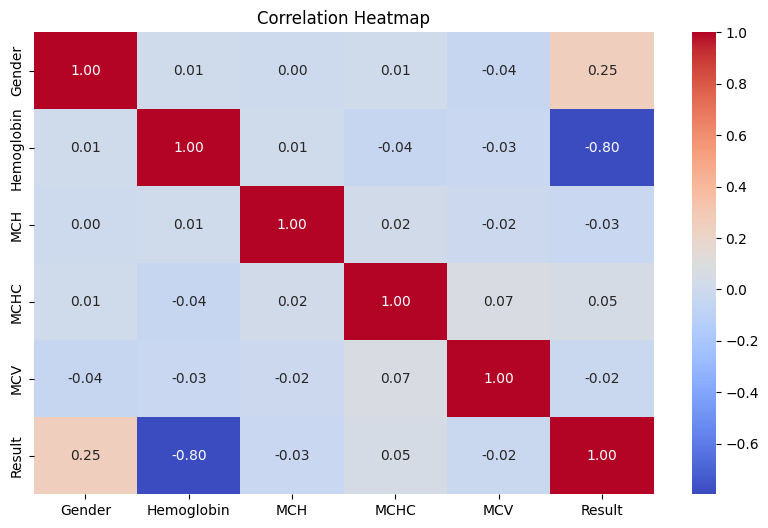

In [ ]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

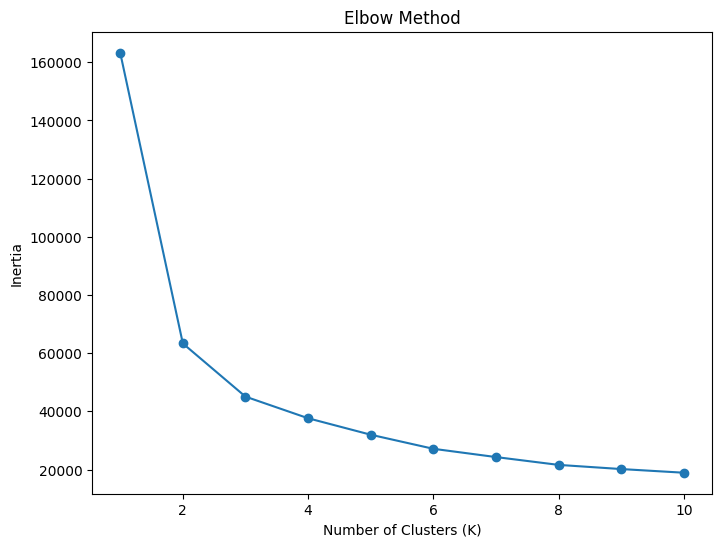

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df)

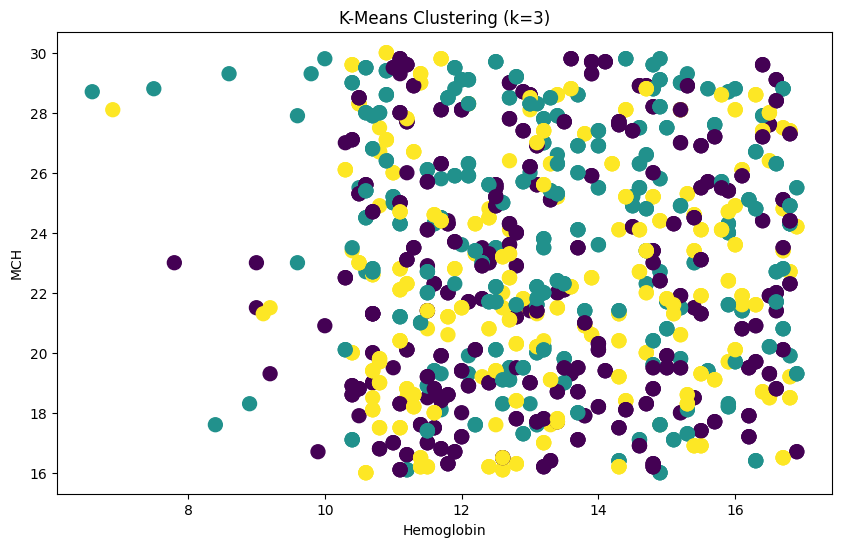

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hemoglobin'], df['MCH'], c=clusters, cmap='viridis', s=100)
plt.xlabel('Hemoglobin')
plt.ylabel('MCH')
plt.title('K-Means Clustering (k=3)')
plt.show()

#Modeling data

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# memisahkan antara x dan y
X = df[df.columns[:5]]
y = df['Result']

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)
#fit berguna untuk pembuatan model dalam pembelajaran mesin

from sklearn.metrics import accuracy_score

# Lakukan prediksi pada data pengujian
y_pred_clf = clf.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_clf)
#Fungsi accuracy_score membandingkan label yang sebenarnya dari data pengujian (y_test) dengan label yang diprediksi oleh model (y_pred_clf)

print("Akurasi Model SVM:", accuracy)

Akurasi Model SVM: 0.9147121535181236


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred_dtc = dtc.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_dtc)

print("Akurasi Model Tree:", accuracy)

Akurasi Model Tree: 1.0


In [ ]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred_logistic = logistic.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_logistic)

print("Akurasi Model Logistic Regression:", accuracy)

Akurasi Model Logistic Regression: 0.9893390191897654


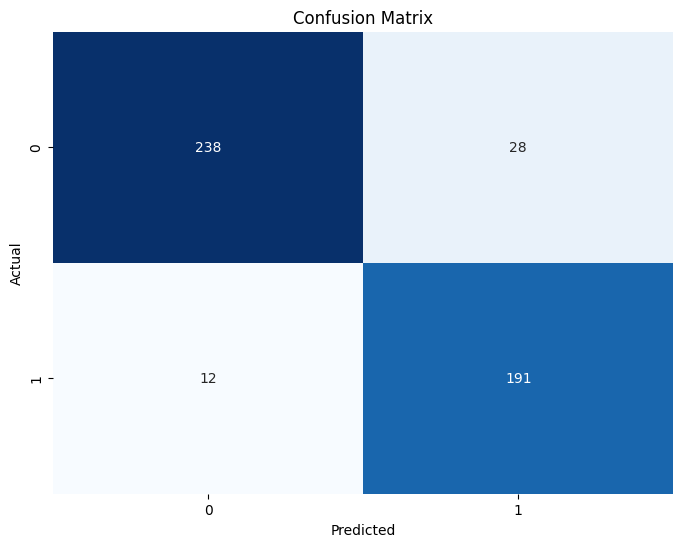

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

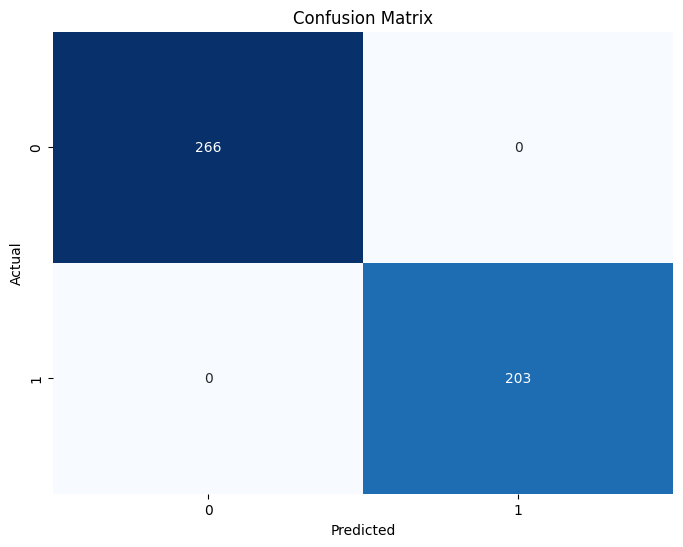

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

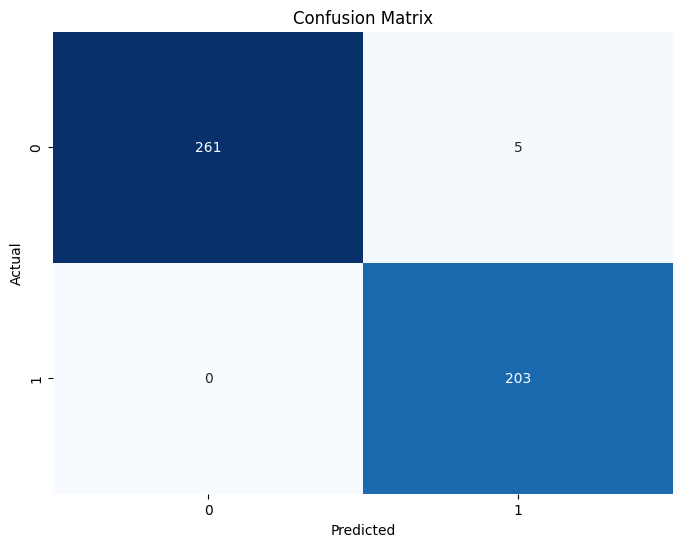

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

predicted anemia


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Memuat dataset dan pra-pemrosesan data
df = pd.read_csv('anemia.csv')

# Memisahkan fitur (X) dan target (y)
X = df.drop('Result', axis=1)  # Fitur-fitur untuk melakukan prediksi
y = df['Result']               # Target atau label yang ingin diprediksi (0 atau 1)

# Step 2: Pelatihan model
model = LogisticRegression()
model.fit(X, y)

# Step 3: Fungsi prediksi berdasarkan input
def predict_outcome(input_data):
    input_df = pd.DataFrame([input_data])
    # Prediksi Outcome
    prediction = model.predict(input_df)
    return prediction[0]

# Contoh penginputan data
input_data = {
    'Gender': 1,
    'Hemoglobin': 4.00,
    'MCH': 22.0,
    'MCHC': 30.0,
    'MCV': 3.0
}

predicted_outcome = predict_outcome(input_data)
print(f'Predicted Outcome: {predicted_outcome}')

Predicted Outcome: 1
